# Zoo Animal Classification
----------
In this notebook I will look at a dataset containing 101 different animals.

Using a decision tree model, we will aim to predict what class an animal is in, taking into account various variables.

----
*Data from: https://www.kaggle.com/uciml/zoo-animal-classification*

*Same data from UCI ML: https://archive.ics.uci.edu/ml/datasets/Zoo*

In [1]:
# General
import pandas as pd

# Ignoring warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data viz
import seaborn as sn
import matplotlib.pyplot as plt

# SkLearn - ML Libraries
from sklearn import tree # Decision Tree
from sklearn.preprocessing import LabelEncoder # Label Encoding - Converting labels to numbers
    ## As DT's can't take strings as an input
from sklearn.metrics import confusion_matrix # Confusion matrix
from sklearn.model_selection import train_test_split # Spilitting data; train & test

In [2]:
# Call data
## Model - Classes
df_class = pd.read_csv(r"C:\Users\ssc44611\Documents\L4 Projects\4. ML Practice Projects\Zoo Classification\class.csv")

## Model - Features
df_features = pd.read_csv(r"C:\Users\ssc44611\Documents\L4 Projects\4. ML Practice Projects\Zoo Classification\zoo.csv")

In [3]:
# Let's look at the CLASSES
df_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [4]:
# Let's look at the FEATURES
df_features.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


As we can see from the data above, most of the features are boolean. 

If _all_ features were boolean, we could've opted for a logistic regression model.

However, __column "legs" has that aren't boolean (not-linear), hence, we should use a decision tree__.

Both of our datasets are fine and don't require any further cleaning

In [5]:
# Let's take a deeper dive into our data
print(f'There are: {df_class.shape[0]} unique classes.')
print("-----------------------------------------")
print(f'The unique classes are: {df_class.Class_Type.unique()}')
print("-----------------------------------------")
print(f'There are: {df_features.shape[1] - 1} unique features.') # -1 because the animal's name isn't a feature of use.
print("-----------------------------------------")
print(f'The unique feature names are: {list(df_features.columns[:-1])}')
print("-----------------------------------------")
print(f'There are: {df_features.shape[0]} unique animals.')

There are: 7 unique classes.
-----------------------------------------
The unique classes are: ['Mammal' 'Bird' 'Reptile' 'Fish' 'Amphibian' 'Bug' 'Invertebrate']
-----------------------------------------
There are: 17 unique features.
-----------------------------------------
The unique feature names are: ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
-----------------------------------------
There are: 101 unique animals.


### Data Processing

In [6]:
# Let's see whether our class data requires cleaning
df_class.isnull().sum()

Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64

In [7]:
# Let's see whether our feature data requires cleaning
df_features.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

Our data seems to be clean with no missing values.

Now, __we'll need to encode any columns that we'll use for the decison tree - as the model can't take strings as an input.__

__However__;
- Our classes are already encoded already; though not 0-x, but 1-x. 
- Our features are already encoded.

We'll just need to drop any columns that we don't really need, such as;
- animal_name (Feature df)
- class_type (Feature df)

In [8]:
# Split data for just the class number and class name - easy reference
class_ref = df_class[["Class_Number", "Class_Type"]]
class_ref

,Class_Number,Class_Type
0,1,Mammal
1,2,Bird
2,3,Reptile
3,4,Fish
4,5,Amphibian
5,6,Bug
6,7,Invertebrate


Let's split out data to be fitted the model

In [9]:
# Extractice class number - target
target = df_features['class_type']
target.head(5)

0    1
1    1
2    4
3    1
4    1
Name: class_type, dtype: int64

In [10]:
# Dropping columns from feature df - features
features = df_features.drop(columns=['animal_name', 'class_type'], axis='columns')
features.head(5)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


### Fitting model

In [11]:
# Splitting our data into test/training sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [12]:
# Looking at the sizes of our test/training sets
print(f"The size of our test set is: {x_test.shape}")
print(f"The size of our training set is: {x_train.shape}")

The size of our test set is: (21, 16)
The size of our training set is: (80, 16)


In [13]:
# Calling our DT
model = tree.DecisionTreeClassifier() # Classifier as this is a classification task

In [14]:
# Fitting our model with the training set
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
# Getting score of our model
model.score(x_test, y_test)

0.9523809523809523

### Testing our model

In [16]:
class_ref

,Class_Number,Class_Type
0,1,Mammal
1,2,Bird
2,3,Reptile
3,4,Fish
4,5,Amphibian
5,6,Bug
6,7,Invertebrate


In [17]:
df_features.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [18]:
# Test #1 - Aardvark (Index=0)
model.predict([[1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1]])

array([1], dtype=int64)

In [19]:
# Test #2 - Bear (Index=2)
model.predict([[1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1]])

array([1], dtype=int64)

In [20]:
# Test #3 - Wasp (Index=97)
model.predict([[1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0]])

array([6], dtype=int64)

In [21]:
# Test #4 - Dolphin (Index=19)
model.predict([[1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1]])

array([1], dtype=int64)

In [22]:
# Test #5 - Stingray (Index=86)
model.predict([[0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1]])

array([4], dtype=int64)

After running 5 tests, we can conclude our model is fairly accurate.

- For the __Aardvark__; our model returned 1 (Mammal) ☑
- For the __Bear__; our model returned 1 (Mammal) ☑
- For the __Wasp__; our model returned 6 (Bug) ☑
- For the __Dolphin__; our model returned 1 (Mammal) ☑
- For the __Stingray__; our model returned 4 (Fish) ☑

### Confusion Matrix

We can use a confusion matrix to visualise the quality of our model, seeing where it hit and where it missed.

In [23]:
# This will be what our model predicted
y_predicted = model.predict(x_test)

# Fit confusion matrix
## We fit our confusion matrix with; y_test (truth) and y_predicted (our prediction)
cm = confusion_matrix(y_test, y_predicted) 
cm

array([[7, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 1, 3]], dtype=int64)

Text(114.0, 0.5, 'True Values')

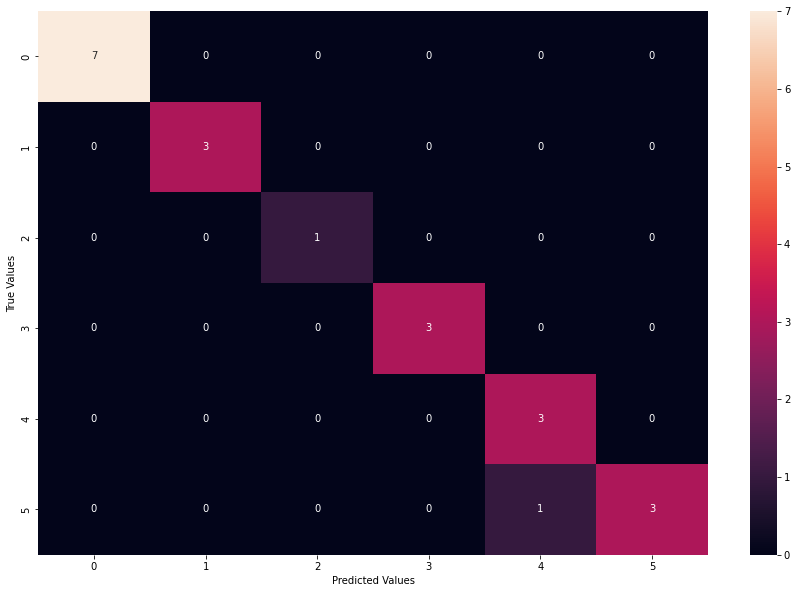

In [24]:
# Let's visualise the confusion matrix
plt.figure(figsize=(15,10))

# Plot CM
sn.heatmap(cm, annot=True)

# Setting graph labels
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

We can keep iterating our train/test split for a better score, but for a model score of ~90%, this is what our CM looks like.